In [ ]:
import scanpy as sc
import numpy as np
import pandas as pd

In [ ]:
adata = sc.read_h5ad("../data/10DPI_1.h5ad")
cell_types = adata.obs["Annotation"].unique().to_list()

In [ ]:
len(cell_types)

18

In [ ]:
receptor_gene_exp = pd.read_csv("../artista_receptor_gene_exp/10DPI_1/npyIN.csv")
receptor_gene_exp = receptor_gene_exp.loc[:, (receptor_gene_exp != 0).any(axis=0)]
receptor_gene_exp = (receptor_gene_exp - receptor_gene_exp.min()) / (receptor_gene_exp.max() - receptor_gene_exp.min())

for ct in cell_types:
    receptor_gene_exp[ct] = 0

coloc_map = pd.read_csv('../colocalization_map/10DPI_1/npyIN.csv')
columns = len(coloc_map.columns)

for index, row in coloc_map.iterrows():
    cell_number = row[0]
    colocalizations = []
    for i in range(1, columns):
        if not pd.isnull(row[i]):
            colocalizations.append(row[i])
    for colocalization in colocalizations:
        receptor_gene_exp.iloc[cell_number, receptor_gene_exp.columns.get_loc(colocalization)] = 1

In [ ]:
# group by the last 18 columns of dataframe, for each unique combination of the last 18 columns
# do the same thing but find average instead of sum
receptor_gene_exp_2 = receptor_gene_exp.groupby(receptor_gene_exp.columns[-18:].tolist()).mean().reset_index()

In [ ]:
receptor_gene_exp_2.head()

,VLMC,tlNBL,MSN,scgnIN,nptxEX,obNBL,CMPN,mpEX,npyIN,MCG,...,MDGA1 | AMEX60DD036390,PPARD | AMEX60DD008779,NMUR1 | AMEX60DD003039,S1PR3 | AMEX60DD042985,CHRNA10[nr]|CHRNA9[hs] | AMEX60DD049891-1,HPGD | AMEX60DD045303,NRCAM | AMEX60DD006339,GPC1 | AMEX60DD002665,ITGB1 | AMEX60DD021794,LGR4 | AMEX60DD004952
0,0,0,0,0,0,0,0,0,0,0,...,0.045339,0.052632,0.0,0.000000,0.022138,0.000000,0.088698,0.062419,0.020361,0.041710
1,0,0,0,0,0,0,1,0,0,0,...,0.073856,0.050000,0.0,0.050000,0.000000,0.069343,0.140922,0.022106,0.038685,0.025000
2,0,0,0,1,0,0,1,0,0,0,...,0.068223,0.029825,0.0,0.010753,0.024321,0.006593,0.128305,0.080758,0.082494,0.047069
3,0,0,1,0,1,0,0,1,0,0,...,0.150515,0.000000,0.0,0.000000,0.000000,0.000000,0.233770,0.000000,0.000000,0.000000
4,0,0,1,1,0,0,1,0,0,0,...,0.109465,0.000000,0.0,0.000000,0.000000,0.000000,0.073082,0.076075,0.035168,0.000000


In [ ]:
# remove rows where all values in the first 18 columns are 0
receptor_gene_exp_2 = receptor_gene_exp_2.loc[(receptor_gene_exp_2.iloc[:, :18] != 0).any(axis=1)]

In [ ]:
receptor_gene_exp_2

,VLMC,tlNBL,MSN,scgnIN,nptxEX,obNBL,CMPN,mpEX,npyIN,MCG,...,MDGA1 | AMEX60DD036390,PPARD | AMEX60DD008779,NMUR1 | AMEX60DD003039,S1PR3 | AMEX60DD042985,CHRNA10[nr]|CHRNA9[hs] | AMEX60DD049891-1,HPGD | AMEX60DD045303,NRCAM | AMEX60DD006339,GPC1 | AMEX60DD002665,ITGB1 | AMEX60DD021794,LGR4 | AMEX60DD004952
1,0,0,0,0,0,0,1,0,0,0,...,0.073856,0.050000,0.000000,0.050000,0.000000,0.069343,0.140922,0.022106,0.038685,0.025000
2,0,0,0,1,0,0,1,0,0,0,...,0.068223,0.029825,0.000000,0.010753,0.024321,0.006593,0.128305,0.080758,0.082494,0.047069
3,0,0,1,0,1,0,0,1,0,0,...,0.150515,0.000000,0.000000,0.000000,0.000000,0.000000,0.233770,0.000000,0.000000,0.000000
4,0,0,1,1,0,0,1,0,0,0,...,0.109465,0.000000,0.000000,0.000000,0.000000,0.000000,0.073082,0.076075,0.035168,0.000000
5,1,0,0,0,0,0,1,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,1,0,0,1,0,0,1,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.177709,0.000000,0.000000,0.000000
7,1,0,1,1,0,0,1,0,0,0,...,0.060044,0.049530,0.058247,0.000000,0.000000,0.027632,0.106509,0.009962,0.049530,0.035714


In [ ]:
# see the first 18 columns of the dataframe
receptor_gene_exp_2.iloc[:, :18]

,VLMC,tlNBL,MSN,scgnIN,nptxEX,obNBL,CMPN,mpEX,npyIN,MCG,cckIN,sstIN,sfrpEGC,CP,reaEGC,wntEGC,dpEX,IMN
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# remove those columns where all values are 0
receptor_gene_exp_2 = receptor_gene_exp_2.loc[:, (receptor_gene_exp_2 != 0).any(axis=0)]

In [ ]:
receptor_gene_exp_2

,VLMC,MSN,scgnIN,nptxEX,CMPN,mpEX,AMME-DAB[nr]|HLA-DRB1[hs] | AMEX60DD010848,KCND1 | AMEX60DD025653,GPR135 | AMEX60DD011873,GPR75 | AMEX60DD032716,...,MDGA1 | AMEX60DD036390,PPARD | AMEX60DD008779,NMUR1 | AMEX60DD003039,S1PR3 | AMEX60DD042985,CHRNA10[nr]|CHRNA9[hs] | AMEX60DD049891-1,HPGD | AMEX60DD045303,NRCAM | AMEX60DD006339,GPC1 | AMEX60DD002665,ITGB1 | AMEX60DD021794,LGR4 | AMEX60DD004952
1,0,0,0,0,1,0,0.000000,0.000000,0.015773,0.025000,...,0.073856,0.050000,0.000000,0.050000,0.000000,0.069343,0.140922,0.022106,0.038685,0.025000
2,0,0,1,0,1,0,0.021505,0.053763,0.076039,0.005376,...,0.068223,0.029825,0.000000,0.010753,0.024321,0.006593,0.128305,0.080758,0.082494,0.047069
3,0,1,0,1,0,1,0.000000,0.250000,0.125000,0.000000,...,0.150515,0.000000,0.000000,0.000000,0.000000,0.000000,0.233770,0.000000,0.000000,0.000000
4,0,1,1,0,1,0,0.000000,0.090909,0.045455,0.000000,...,0.109465,0.000000,0.000000,0.000000,0.000000,0.000000,0.073082,0.076075,0.035168,0.000000
5,1,0,0,0,1,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,1,0,1,0,1,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.177709,0.000000,0.000000,0.000000
7,1,1,1,0,1,0,0.000000,0.000000,0.076105,0.000000,...,0.060044,0.049530,0.058247,0.000000,0.000000,0.027632,0.106509,0.009962,0.049530,0.035714


In [ ]:
# except for the first 18 columns, find standard deviation of each column and keep only top 10 columns
gene_list = receptor_gene_exp_2.iloc[:, 6:].std().nlargest(10).index.tolist()

In [ ]:
gene_list

['LOC108711469[nr]|SV2B[hs] | AMEX60DD003452',
 'IGSF11 | AMEX60DD047013',
 'KL | AMEX60DD049227',
 'P2RY1 | AMEX60DD001889',
 'NRP2 | AMEX60DD055040',
 'ADAM22 | AMEX60DD022134',
 'RNF43 | AMEX60DD054282',
 'TIE1 | AMEX60DD020063',
 'LOC108699476[nr]|EFNA3[hs] | AMEX60DD014867',
 'CHRM4 | AMEX60DD005267']

In [ ]:
# add the first 18 columns to the gene list
gene_list = receptor_gene_exp_2.columns[:6].tolist() + gene_list

# keep only those columns in the dataframe
receptor_gene_exp_2 = receptor_gene_exp_2[gene_list]

In [ ]:
receptor_gene_exp_2

,VLMC,MSN,scgnIN,nptxEX,CMPN,mpEX,LOC108711469[nr]|SV2B[hs] | AMEX60DD003452,IGSF11 | AMEX60DD047013,KL | AMEX60DD049227,P2RY1 | AMEX60DD001889,NRP2 | AMEX60DD055040,ADAM22 | AMEX60DD022134,RNF43 | AMEX60DD054282,TIE1 | AMEX60DD020063,LOC108699476[nr]|EFNA3[hs] | AMEX60DD014867,CHRM4 | AMEX60DD005267
1,0,0,0,0,1,0,0.017810,0.050000,0.046039,0.053959,0.040773,0.139175,0.000000,0.000000,0.000000,0.080721
2,0,0,1,0,1,0,0.084558,0.072761,0.041193,0.124219,0.115076,0.147230,0.000000,0.000000,0.045826,0.155221
3,0,1,0,1,0,1,0.436967,0.000000,0.000000,0.238561,0.000000,0.072266,0.000000,0.000000,0.473197,0.216799
4,0,1,1,0,1,0,0.000000,0.000000,0.000000,0.027366,0.045455,0.041651,0.000000,0.057357,0.090909,0.105114
5,1,0,0,0,1,0,1.000000,0.898244,0.000000,0.698970,0.630930,0.578130,0.000000,0.000000,0.000000,0.578130
6,1,0,1,0,1,0,0.000000,0.000000,0.782288,0.349485,0.000000,0.000000,0.500000,0.500000,0.000000,0.144532
7,1,1,1,0,1,0,0.061158,0.027632,0.000000,0.089470,0.058247,0.169296,0.035714,0.000000,0.022533,0.152326


In [ ]:
# get all except first 6 columns
receptor_gene_exp_3 = receptor_gene_exp_2.iloc[:, 6:]


In [ ]:
# only first 5 columns
receptor_gene_exp_4 = receptor_gene_exp_3.iloc[:, :4]

In [ ]:
receptor_gene_exp_4.index

Int64Index([1, 2, 3, 4, 5, 6, 7], dtype='int64')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

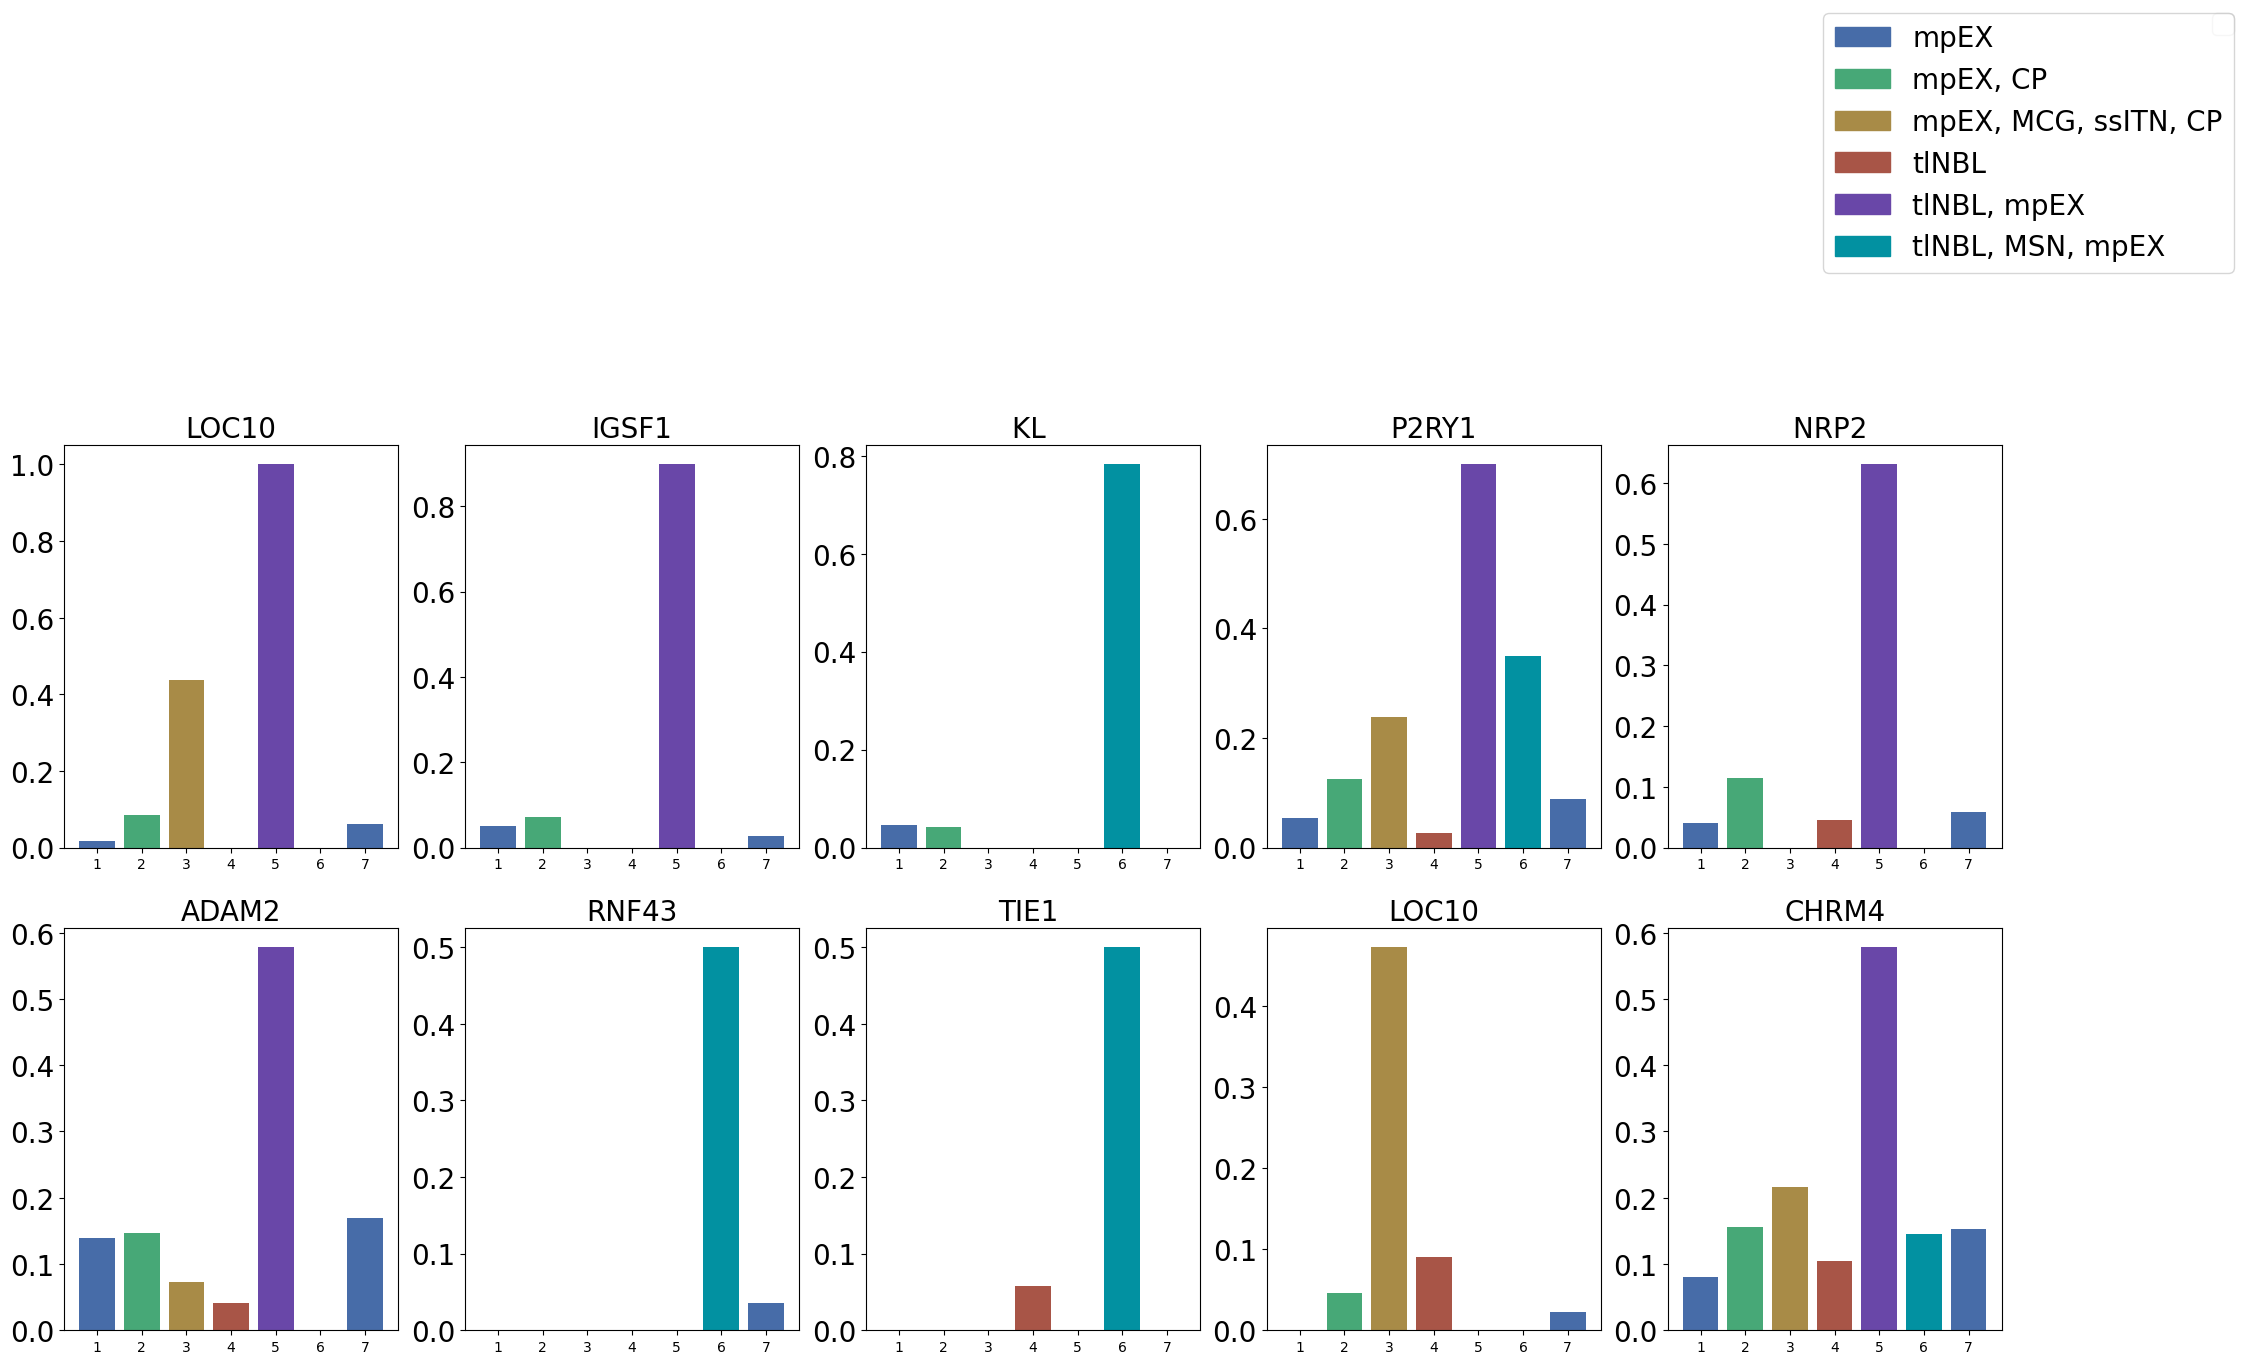

In [ ]:
import matplotlib.pyplot as plt

# Number of rows and columns for subplots
nrows = 2
ncols = 5

plt.clf()

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 15))  # Adjust the figsize as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

bar_labels = ['mpEX', 'mpEX, CP', 'mpEX, MCG, ssITN, CP', 'tlNBL', 'tlNBL, mpEX', 'tlNBL, MSN, mpEX']
colors = ['#476ca8', '#47a877', '#a88b47', '#a85547', '#6947a8', '#0291a1']

# create legend for the colors with corresponding labels after creating empty space

# create empty space on top before plots
# fig.subplots_adjust(top=6.8)

# Loop through the columns and create bar plots
for i, col in enumerate(receptor_gene_exp_3.columns):
    val = receptor_gene_exp_3[col].values
    # Create a bar plot with the corresponding color
    axes[i].bar(receptor_gene_exp_3.index, val, color=colors)
    # increase y axis label size
    axes[i].tick_params(axis='y', labelsize=20)
    # remove x axis label
    axes[i].set_xlabel('')
    # increase title size
    axes[i].set_title(col.split('|')[0][:5], size=20)

    # # to each bar, add the corresponding label
    # # place text at the top of the bar diagonally
    # # slightly shift to the right
    # for j, v in enumerate(val):
    #     axes[i].text(j, v + 0.01, bar_labels[j], ha='center', va='bottom', rotation=45)

fig.legend(fontsize=20)
fig.legend(handles=[plt.Rectangle((0, 0), 1, 1, color=colors[i], label=bar_labels[i]) for i in range(len(bar_labels))],
           loc='upper right', fontsize=20)
# Adjust layout to prevent overlap
# plt.tight_layout()
plt.subplots_adjust(top=0.7) 

plt.savefig("top10_genes_coloc_exp.pdf")
